In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 


In [2]:
df = pd.read_csv(r'C:\Users\surya\OneDrive\Desktop\SP MANAS\Task 2.0\train.csv')
df.head()

,date,high,low,momentum_index,beta_indicator,risk_premium,index,volatility_factor,technical_score,oscillator_value,liquidity_ratio,open,quant_index,trend_strength,market_sentiment,close,volume,alpha_signal,symbols
0,2012-06-22,24.797176,162.793195,153.349972,90.290064,277.383362,62235.0,105.868473,128.280484,38.359969,154.844720,122.656593,3817.034814,-48.017571,-42.552169,95.610001,NaN,126.405476,MRO
1,2013-02-27,84.148858,62.911473,123.066280,99.689780,116.635811,48784.0,116.700703,8.730951,-35.866296,-53.482145,48.429243,4522.962303,149.657066,221.824044,27.410000,24383100.0,-22.111984,HRS
2,2010-07-19,162.714072,7.813419,50.140068,-30.373609,145.254746,233118.0,302.752221,-40.118103,-50.358825,27.921367,144.410310,1277.720791,284.891018,58.834733,25.230000,38181800.0,20.068656,Low
3,2015-12-31,-128.017977,-38.679447,-21.881272,-173.386894,-123.314003,28867.0,-3.662459,81.801806,-53.396998,-11.014860,-12.281054,636.545321,-210.812924,137.518347,30.000000,944600.0,75.297134,ULTA
4,2012-11-12,204.768157,-6.981525,-38.978256,64.867265,-90.095079,182732.0,-157.223822,-76.111066,149.650023,-29.829836,-48.492927,3044.960784,293.534187,15.030557,68.480003,2780300.0,82.056444,Low


In [3]:
df=df.dropna(axis=0)
print(len(df))
df.columns

263628


Index(['date', 'high', 'low', 'momentum_index', 'beta_indicator',
       'risk_premium', 'index', 'volatility_factor', 'technical_score',
       'oscillator_value', 'liquidity_ratio', 'open', 'quant_index',
       'trend_strength', 'market_sentiment', 'close', 'volume', 'alpha_signal',
       'symbols'],
      dtype='object')

In [4]:

y=df['close']


X=df.drop(labels=['date','close','symbols'],axis=1)





print(len(X.columns))

16


In [5]:
def Compute_error(X,y,slope,c):
    total_error=0
    for i in range(X.shape[0]):
        pred_value= np.dot(slope,X[i]) + c #predicted value
        error_sample = (pred_value-y[i])**2  #calculated error for one row
        total_error+= error_sample
    total_error=(1/(2*X.shape[0]))*total_error
    return total_error
    

In [8]:
def Gradient(X,y,slope,c):
  
    Pd_c=0 # partial derivative term for intercept 
    m,n=X.shape # m rows and n columns or features 
    Pd_slope=np.zeros((n,)) # partial derivative term for slope 
    for i in range(m):
        pred = np.dot(slope,X[i])+c
        err=pred-y[i]
        for j in range(n):
            Pd_slope[j]+=err*X[i,j]
        
        Pd_c+=err
    Pd_c=Pd_c/m
    Pd_slope=Pd_slope/m
    return Pd_slope,Pd_c


def model(n_iter,X,y,slope,c,lr):
    
    cost_history=[]
    slope_hist=[]
    c_hist=[]
    for i in range(n_iter):
        Pd_slope,Pd_c = Gradient(X,y,slope,c)
        slope=slope-(lr*Pd_slope)
        c=c-(Pd_c*lr)
        cost=Compute_error(X,y,slope,c)
        cost_history.append(cost)
        slope_hist.append(slope)
        c_hist.append(c)
        
    return cost_history,slope_hist,c_hist
  

In [5]:
def predict(X,y,slope,c):
    y_pred=[]
    total_error=0
    for i in range(X.shape[0]):
        pred_value= np.dot(slope,X[i]) + c
        y_pred.append(pred_value) #predicted value
        error_sample = (pred_value-y[i])**2  #calculated error for one row
        total_error+= error_sample
    total_error=(1/(2*X.shape[0]))*total_error
  
    y_mean= np.mean(y)
    sst = np.sum((y - y_mean)**2)
    ssr = np.sum((y - y_pred)**2)
    r_squared = 1 - (ssr / sst)
    return total_error,r_squared,y_pred

In [10]:
#Standardisatin of X 
mean_col=np.mean(X,axis=0)
std_col=np.std(X,axis=0)
X=(X-mean_col)/std_col



In [11]:
slope_init=[]
c_init=1
for i in range(16):
    slope_init.append(1)

X=np.array(X)
y=np.array(y)

In [12]:
n_iter= 100
cost_hist,slope_hist,c_hist=model(n_iter,X,y,slope_init,c_init,0.05)

'''
slope_hist contains the slopes used for all the epochs 
slope_hist[n_iter-1] will give the best performing slopes 


'''

'\nslope_hist contains the slopes used for all the epochs \nslope_hist[n_iter-1] will give the best performing slopes \n\n\n'

Text(0, 0.5, 'MSE cost')

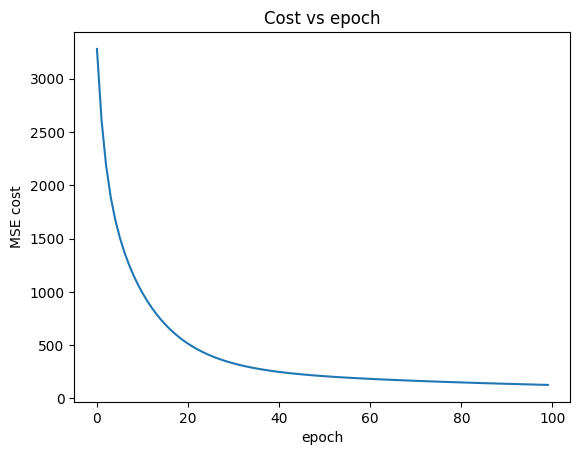

In [13]:
plt.plot(cost_hist)
plt.title("Cost vs epoch")
plt.xlabel("epoch")
plt.ylabel("MSE cost")


In [14]:
print(slope_hist[n_iter-1])
print(c_hist[n_iter-1])

[ 2.15793669e+01  1.97831436e+01 -1.02477213e+01  9.94512019e+00
  5.27676154e+00  2.19521801e-02 -1.03331133e+01  2.26766761e+00
  8.00813054e+00  1.12300874e+01  2.29428398e+01  9.94546845e-02
 -1.03516951e+01  3.99192208e+00 -7.43479257e-01  2.60119698e+00]
64.39745746576718


In [8]:
df_test= pd.read_csv(r'C:\Users\surya\OneDrive\Desktop\SP MANAS\Task 2.0\test.csv')
df_test=df_test.dropna(axis=0)


In [9]:

print(len(df_test))

173508


In [10]:
X_test=df_test.drop(labels=['date','close','symbols'],axis=1)
#X_test=X_test.iloc[:10000]
y_test=df_test['close']
#y_test=y_test.iloc[:10000]

In [11]:
mean_col=np.mean(X_test,axis=0)
std_col=np.std(X_test,axis=0)
X_test=(X_test-mean_col)/std_col

In [12]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [13]:
slope_m= [ 2.15793669e+01 , 1.97831436e+01, -1.02477213e+01 , 9.94512019e+00,
  5.27676154e+00,  2.19521801e-02, -1.03331133e+01,  2.26766761e+00,
  8.00813054e+00 , 1.12300874e+01 , 2.29428398e+01 , 9.94546845e-02,
 -1.03516951e+01,  3.99192208e+00 ,-7.43479257e-01,  2.60119698e+00]
c_m=64.39745746576718
err,r_squared,y_pred=predict(X_test[:10000],y_test[:10000],slope_m,c_m)


In [14]:
print("R sqaured : " ,r_squared)
adj_r_sqr= 1 - (1 - r_squared) * ((len(df_test) - 1) / (len(df_test) - 16 - 1))
print("Adjustated r squared:",adj_r_sqr)

R sqaured :  0.2587544415617715
Adjustated r squared: 0.25868608107658786
